In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 

In [2]:
diabetes_data = pd.read_csv("diabetes.csv")
print(diabetes_data["Outcome"].value_counts())
diabetes_data.head(3)

Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=156,
                                                    stratify=y)
print(y_train.value_counts()/y_test.value_counts())

Outcome
0    4.000000
1    3.962963
Name: count, dtype: float64


In [5]:
Ir_clf = LogisticRegression(solver="liblinear")
Ir_clf.fit(X_train, y_train)
pred = Ir_clf.predict(X_test)
pred_proba = Ir_clf.predict_proba(X_test)[:, 1]

In [6]:
from userFunction import get_clf_eval
get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[87 13]
 [22 32]]
정확도 : 0.7727, 정밀도 : 0.7111, 재현율 : 0.5926,F1 : 0.6465, AUC :0.8083


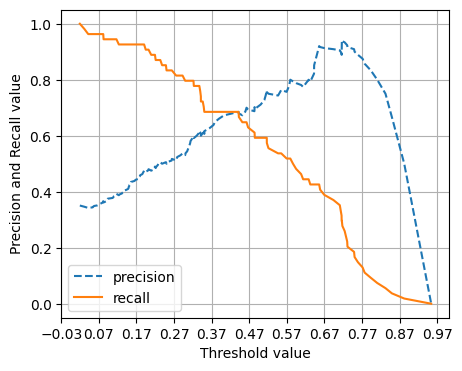

In [7]:
from userFunction import precision_recall_curve_plot
precision_recall_curve_plot(y_test, pred_proba)

In [8]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


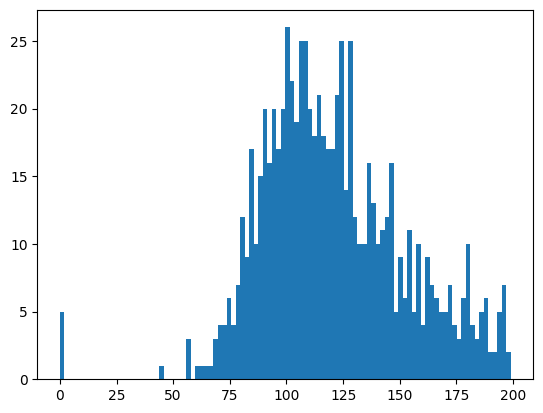

In [9]:
plt.hist(diabetes_data["Glucose"], bins=100)
plt.show()

In [10]:
zero_features = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
total_count = diabetes_data["Glucose"].count()
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature]== 0][feature].count()
    print(f"{feature} 0 건수는 {zero_count}, 퍼센츠는 {zero_count/total_count*100:.2f}") 

Glucose 0 건수는 5, 퍼센츠는 0.65
BloodPressure 0 건수는 35, 퍼센츠는 4.56
SkinThickness 0 건수는 227, 퍼센츠는 29.56
Insulin 0 건수는 374, 퍼센츠는 48.70
BMI 0 건수는 11, 퍼센츠는 1.43


In [11]:
mean_zero_feature = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_feature)

In [12]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled.mean(axis=0))
print(X_scaled.var(axis=0))

[-6.47630098e-17 -1.59594560e-16  1.15648232e-17  2.86807615e-16
 -4.39463281e-17 -3.16876155e-16  2.45174251e-16  1.93132547e-16]
[1. 1. 1. 1. 1. 1. 1. 1.]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2,
                                                     random_state=156, stratify=y)

In [16]:
Ir_clf = LogisticRegression(solver='liblinear')
Ir_clf.fit(X_train, y_train)
pred = Ir_clf.predict(X_test)
pred_proba = Ir_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도 : 0.7987, 정밀도 : 0.7674, 재현율 : 0.6111,F1 : 0.6804, AUC :0.8433


In [17]:
from userFunction import get_eval_by_threshold

In [18]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba =Ir_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)


임계값 :  0.3
오차 행렬
[[65 35]
 [11 43]]
정확도 : 0.7013, 정밀도 : 0.5513, 재현율 : 0.7963,F1 : 0.6515, AUC :0.8433

임계값 :  0.33
오차 행렬
[[71 29]
 [11 43]]
정확도 : 0.7403, 정밀도 : 0.5972, 재현율 : 0.7963,F1 : 0.6825, AUC :0.8433

임계값 :  0.36
오차 행렬
[[76 24]
 [15 39]]
정확도 : 0.7468, 정밀도 : 0.6190, 재현율 : 0.7222,F1 : 0.6667, AUC :0.8433

임계값 :  0.39
오차 행렬
[[78 22]
 [16 38]]
정확도 : 0.7532, 정밀도 : 0.6333, 재현율 : 0.7037,F1 : 0.6667, AUC :0.8433

임계값 :  0.42
오차 행렬
[[84 16]
 [18 36]]
정확도 : 0.7792, 정밀도 : 0.6923, 재현율 : 0.6667,F1 : 0.6792, AUC :0.8433

임계값 :  0.45
오차 행렬
[[85 15]
 [18 36]]
정확도 : 0.7857, 정밀도 : 0.7059, 재현율 : 0.6667,F1 : 0.6857, AUC :0.8433

임계값 :  0.48
오차 행렬
[[88 12]
 [19 35]]
정확도 : 0.7987, 정밀도 : 0.7447, 재현율 : 0.6481,F1 : 0.6931, AUC :0.8433

임계값 :  0.5
오차 행렬
[[90 10]
 [21 33]]
정확도 : 0.7987, 정밀도 : 0.7674, 재현율 : 0.6111,F1 : 0.6804, AUC :0.8433
